Частина 3: Підготовка та аналіз даних на основі файлу AmesHousing.csv (виконується тільки для отримання високої оцінки).

Завантажте файл даних "AmesHousing.csv", який містить інформацію про нерухомість в місті Еймс, штат Айова, США.

Вивчіть структуру даних та характеристики ознак. Визначте цільову змінну для регресії (наприклад, ціну житла).

Виконайте підготовку даних, таку як обробка відсутніх значень, перетворення категоріальних ознак у числові, масштабування тощо.

Побудуйте модель регресії на підготовлених даних і оцініть її точність.



In [33]:
import pandas as pd 
import matplotlib.pyplot as plt

#зчитую дані з файлу
data = pd.read_csv('AmesHousing.csv')
print(data.head())

#розділяю дані
X = data.drop(['SalePrice'], axis = 1) # - все крім ціни як цільової змінної
y = data['SalePrice'] # - цільова змінна - ціна житла

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

Спочатку я відкрив дані та розділив їх

In [51]:
from sklearn.preprocessing import LabelEncoder

#вивід стовпців з наявними нульовими значеннями
missing_values = X.isnull().sum()
print(missing_values[missing_values != 0])


#перетворення категорійних даних на числові
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

#заміщення пустих значень середньостатистичними
X.fillna(X.mean(), inplace=True)   

Series([], dtype: int64)


Потім я почав дивитися, у яких стовпцях датасету найбільше пропусків (вивів це). Після цього перетворив категорійні дані у числові, щоб з ними можна було працювати, адже в датасеті було багато категорійних даних, записаних текстом.

Після цього я заповнив пусті значення середньостатистичними в їхній категорії. Це дозволить уникнути помилок при роботі з даними.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor


#розділяємо дані на тестові і для навчання
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)

#масштабування даних
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

#створюємо модель, навчаємо її
model = DecisionTreeRegressor()
model.fit(X_train_sc, y_train)

#прогнозуємо значення ціни
y_pred = model.predict(X_test_sc)

#обрахування точності моделі
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")



R2: 0.7363440207667774


Тут я вже розділив дані на тестовий та навчальні набори, масштабував їх за допомогою `StandartScaler`, щоб з ними було зручніше працювати, а потім створив модель МН і натренував її на цих даних. Потім обрахував коефіцієнт детермінації, для обрахування точности моделі. Вийшло приблизно 0.74 - доволі точно, як на мене, проте не ідеально. 

Далі займуся візуалізацією.

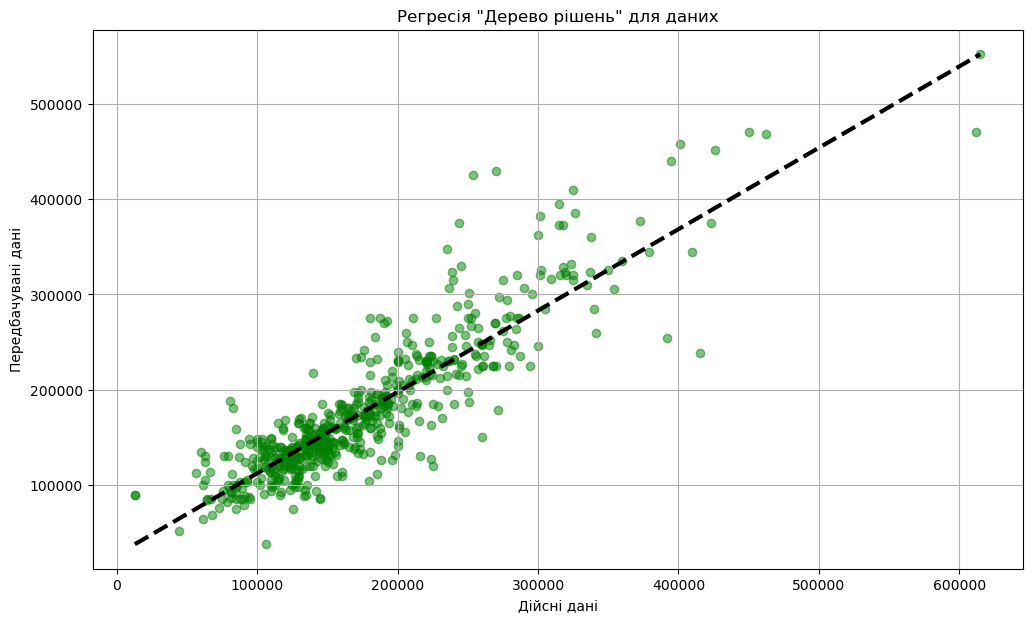

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 7))
plt.title("Регресія \"Дерево рішень\" для даних")
plt.xlabel('Дійсні дані')
plt.ylabel('Передбачувані дані')
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='black', linewidth=3)
plt.grid()
plt.show()



Наприкінець я вивів дані. Тут, в принципі, нічого особливого.